<a href="https://colab.research.google.com/github/Hsuan7/homework/blob/main/%E9%87%91%E8%9E%8D%E5%A4%A7%E6%95%B8%E6%93%9AW7_%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92ANN%E3%80%81CN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

使用 TensorFlow 或 PyTorch 實作類神經網路模型預測股票價格（TensorFlow 使用 Dense layer；PyTorch 使用 Linear layer）。
說明：使用收盤價或技術指標預測，預測N日後的股價

In [69]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件

# 輸入股票代號
stock_id = "2330.tw"
# stock_id = "2357.tw"
# stock_id = "AAPL"
# stock_id = "NVDA"

'''今天往前算幾天'''
# 資料結束時間
#end = dt.date.today()
# 抓取半年資料（現在-過去180天）
#start = end - dt.timedelta(days=180)

'''抓取特定時間'''
start = dt.datetime(2020, 1, 1)  # 指定的開始日期
end = dt.datetime(2023, 1, 1)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df = yf.download(stock_id, start=start, end=end).reset_index()

df

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW
0,2020-01-02 00:00:00+00:00,306.430237,339.0,339.0,332.5,332.5,31754120
1,2020-01-03 00:00:00+00:00,306.882202,339.5,345.0,335.5,344.0,41811268
2,2020-01-06 00:00:00+00:00,300.102753,332.0,334.5,332.0,333.0,45343057
3,2020-01-07 00:00:00+00:00,297.842957,329.5,333.0,326.5,332.5,50879181
4,2020-01-08 00:00:00+00:00,297.842957,329.5,333.0,325.0,325.0,37567748
...,...,...,...,...,...,...,...
729,2022-12-26 00:00:00+00:00,441.325256,456.5,457.0,453.5,454.0,8793306
730,2022-12-27 00:00:00+00:00,441.808624,457.0,462.5,457.0,458.0,10264001
731,2022-12-28 00:00:00+00:00,436.008057,451.0,452.0,446.0,451.0,32578949


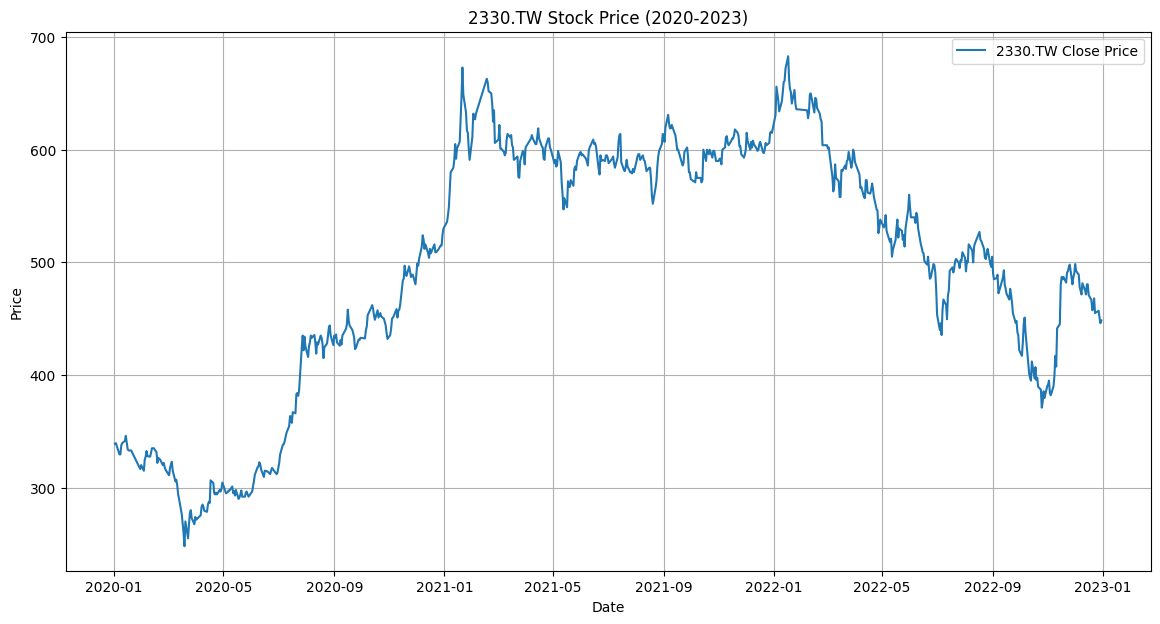

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['Close'], label="2330.TW Close Price")
plt.title("2330.TW Stock Price (2020-2023)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

In [71]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 將收盤價標準化
scaler = MinMaxScaler(feature_range=(0, 1))
df['Close'] = scaler.fit_transform(df[['Close']])

# 設定預測N日後的股價
N = 1  # 這裡設定 N = 1，即使用今天的價格預測明天的價格
X = []
y = []

# 建立特徵和標籤
for i in range(len(df) - N):
    X.append(df['Close'].values[i:i + N])
    y.append(df['Close'].values[i + N])

X, y = np.array(X), np.array(y)

In [73]:
# 分割訓練和測試數據
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# 建立 ANN 模型 (使用 Dense 層)
model = Sequential()
model.add(Dense(64, input_dim=N, activation='relu'))  # 第一隱藏層
model.add(Dense(32, activation='relu'))               # 第二隱藏層
model.add(Dense(1, activation='linear'))              # 輸出層

# 編譯模型
model.compile(loss='mse', optimizer='adam')

# 訓練模型
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# 預測測試數據
predictions = model.predict(X_test)

# 反轉標準化
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# 評估模型
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions_rescaled))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2746 - val_loss: 0.2455
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1166 - val_loss: 0.0680
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0266 - val_loss: 0.0042
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - val_loss: 0.0022
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - val_loss: 0.0015
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - val_loss: 0.0010
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016 - val_loss: 6.2420e-04
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.5430e-04 - val_loss: 5.6439e-04
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.4320e-04 - val_loss: 5.2738e-04
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2171e-04 - val_loss: 5.3154e-04
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.2486e-04 - val_loss: 5.4186e-04
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/st

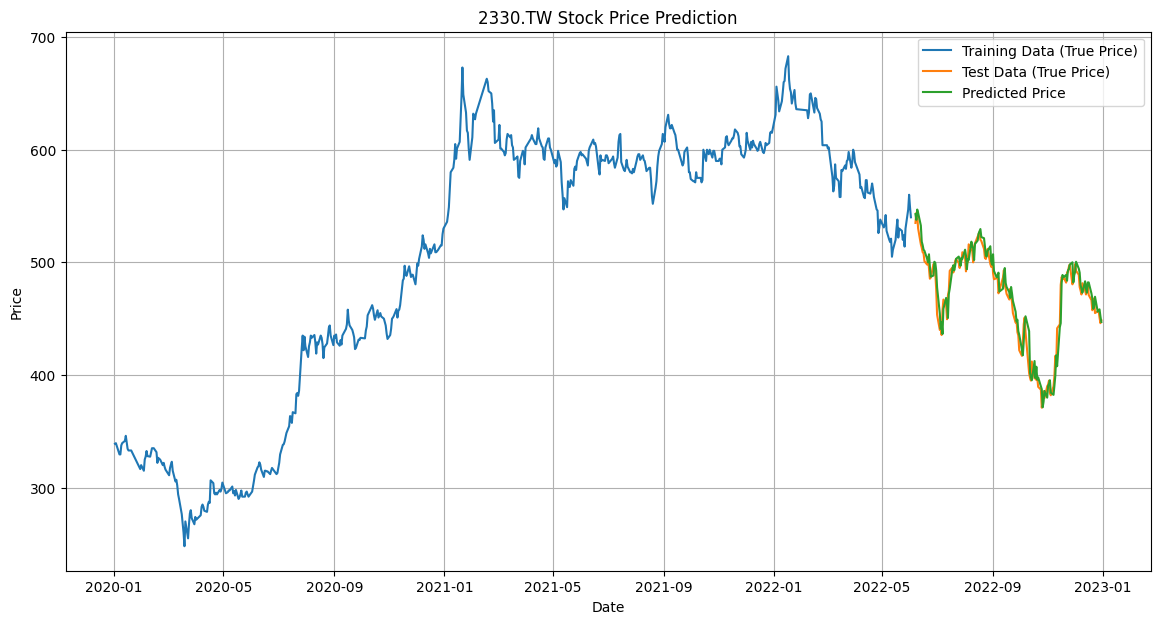

In [74]:
# 可視化訓練集與測試集
plt.figure(figsize=(14, 7))

# 繪製訓練集的真實價格
plt.plot(df.index[:train_size], scaler.inverse_transform(df[['Close']][:train_size]), label="Training Data (True Price)")  # 訓練集真實值

# 調整測試資料的索引範圍，確保預測和實際值對齊
adjusted_index = df.index[train_size + N:]

# 繪製測試集的真實價格與預測價格
plt.plot(adjusted_index, y_test_rescaled[:len(predictions_rescaled)], label="Test Data (True Price)")  # 測試集真實值
plt.plot(adjusted_index, predictions_rescaled, label="Predicted Price")  # 預測值

# 繪圖標題與軸標籤
plt.title("2330.TW Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")

# 加上圖例與格線
plt.legend()
plt.grid(True)

# 顯示圖表
plt.show()


使用 TensorFlow 或 PyTorch 實作 CNN 捕捉 K 線趨勢，並預測股價漲跌（分類任務）。
說明：輸入一張 N 天的 K 線圖判斷未來價格可能漲或跌，label 方式可以使用技術指標輔助，例如：5日均線高於10日均線標註「漲」，5日均線低於10日均線標註「跌」

In [76]:
!pip install mplfinance

In [90]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件

# 輸入股票代號
stock_id = "2330.tw"


'''今天往前算幾天'''
# 資料結束時間
end = dt.date.today()
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=180)

# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df = yf.download(stock_id, start=start, end=end).reset_index()

df

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW
0,2024-05-03 00:00:00+00:00,773.547241,780.0,788.0,773.0,788.0,29901556
1,2024-05-06 00:00:00+00:00,779.497620,786.0,793.0,786.0,791.0,32599878
2,2024-05-07 00:00:00+00:00,793.381836,800.0,800.0,792.0,797.0,33890214
3,2024-05-08 00:00:00+00:00,795.365295,802.0,802.0,792.0,794.0,21757193
4,2024-05-09 00:00:00+00:00,789.414917,796.0,802.0,796.0,798.0,21923999
...,...,...,...,...,...,...,...
116,2024-10-23 00:00:00+00:00,1060.000000,1060.0,1070.0,1055.0,1060.0,31423466
117,2024-10-24 00:00:00+00:00,1060.000000,1060.0,1075.0,1055.0,1070.0,38236996
118,2024-10-25 00:00:00+00:00,1065.000000,1065.0,1070.0,1060.0,1065.0,22009575


In [93]:
# 將日期欄位轉為datetime格式
df["Date"] = pd.to_datetime(df["Date"])

# 刪除 Ticker 欄位並取代
df.columns = df.columns.droplevel('Ticker')

In [94]:
# 計算 5 日與 10 日均線
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_10'] = df['Close'].rolling(window=10).mean()

# 標註漲跌：當 MA_5 > MA_10 為「漲」，反之為「跌」
df['Label'] = (df['MA_5'] > df['MA_10']).astype(int)  # 1 表示「漲」，0 表示「跌」


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32218 (\N{CJK UNIFIED IDEOGRAPH-7DDA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


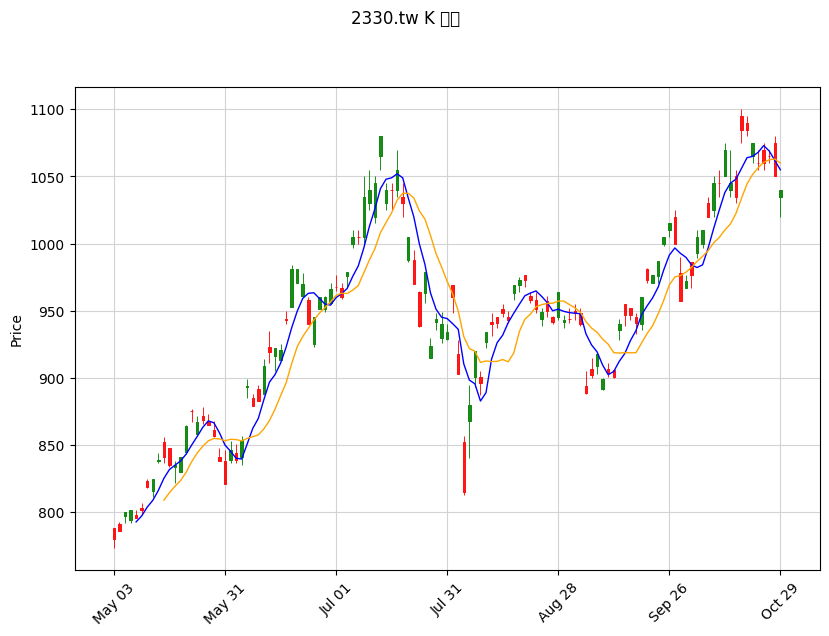

In [96]:
import mplfinance as mpf

# 設置顏色風格
mc = mpf.make_marketcolors(up='g', down='r', wick='i', edge='i')
s = mpf.make_mpf_style(marketcolors=mc, gridstyle='-', gridcolor="lightgray")

# 定義均線參數
add_plot = [
    mpf.make_addplot(df['MA_5'], color='blue', width=1.0, linestyle='-'),   # 5 日均線
    mpf.make_addplot(df['MA_10'], color='orange', width=1.0, linestyle='-') # 10 日均線
]

# 繪製 K 線圖
mpf.plot(
    df.set_index('Date'),                 # 設置日期作為索引
    type='candle',                     # 使用 K 線圖
    style=s,                        # 設置風格
    addplot=add_plot,                   # 添加均線
    #volume=True,                     # 顯示成交量
    title=f'{stock_id}',                  # 標題
    ylabel='Price',                    # 價格標籤
    #ylabel_lower='Volume',                # 成交量標籤
    show_nontrading=False,                 # 隱藏非交易日期
    figratio=(12,8),                    # 圖片比例
    figscale=1.2                      # 圖片放大比例
)



In [113]:
# 重新初始化標籤列表
labels = []
file_names = []
window_size = 30  # K線圖的時間窗口

# 定義短期和長期均線的週期
short_window = 5  # 短期均線
long_window = 10  # 長期均線


窗口0的短期均線: 955.00, 長期均線: 952.30, 標記為「漲」: 1

--------------------------------



NameError: name 'os' is not defined

In [117]:
from PIL import Image  # 處理圖像資料
import random  # 隨機
import os  # 系統檔，讀取資料使用
import mplfinance as mpf
import pandas as pd  # 載入 pandas 套件

window_size = 30  # K線圖的時間窗口

# 定義短期和長期均線的週期
short_window = 5  # 短期均線
long_window = 10  # 長期均線

# K線圖保存的文件夾
output_dir = 'k_line_images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 儲存標籤
labels = []
file_names = []

# 迴圈處理數據並生成標籤和 K 線圖
for i in range(len(df) - window_size):
    window_data = df.iloc[i:i + window_size]  # 當前 K 線圖窗口

    # 計算短期均線和長期均線
    short_ma = window_data['Close'].rolling(window=short_window).mean().iloc[-1]
    long_ma = window_data['Close'].rolling(window=long_window).mean().iloc[-1]

    print(f'窗口{i}的短期均線: {short_ma:.2f}, 長期均線: {long_ma:.2f}, 標記為', end='')

    # 判斷漲跌：短期均線高於長期均線則標記為漲，否則標記為跌
    if short_ma > long_ma:
        labels.append(1)  # 漲
        print('「漲」: 1')
    else:
        labels.append(0)  # 跌
        print('「跌」: 0')

    print('\n--------------------------------\n')

    # 生成文件名
    file_name = f'k_line_{i}.png'
    file_names.append(file_name)

    # 保存 K 線圖
    mpf.plot(window_data, type='candle', style='charles', axisoff=True,  # 你可以根據需要選擇不同的風格
             figsize=(15, 6), savefig=os.path.join(output_dir, file_name))

# 保存標籤到 CSV 文件中
labels_df = pd.DataFrame({
    'file_name': file_names,
    'label': labels
})

labels_df.to_csv('labels.csv', index=False)


窗口0的短期均線: 955.00, 長期均線: 952.30, 標記為「漲」: 1

--------------------------------

窗口1的短期均線: 954.20, 長期均線: 956.70, 標記為「跌」: 0

--------------------------------

窗口2的短期均線: 959.80, 長期均線: 961.40, 標記為「跌」: 0

--------------------------------

窗口3的短期均線: 962.80, 長期均線: 963.10, 標記為「跌」: 0

--------------------------------

窗口4的短期均線: 966.60, 長期均線: 962.90, 標記為「漲」: 1

--------------------------------

窗口5的短期均線: 975.60, 長期均線: 965.30, 標記為「漲」: 1

--------------------------------

窗口6的短期均線: 983.40, 長期均線: 968.80, 標記為「漲」: 1

--------------------------------

窗口7的短期均線: 996.80, 長期均線: 978.30, 標記為「漲」: 1

--------------------------------

窗口8的短期均線: 1012.80, 長期均線: 987.80, 標記為「漲」: 1

--------------------------------

窗口9的短期均線: 1026.00, 長期均線: 996.30, 標記為「漲」: 1

--------------------------------

窗口10的短期均線: 1041.00, 長期均線: 1008.30, 標記為「漲」: 1

--------------------------------

窗口11的短期均線: 1048.00, 長期均線: 1015.70, 標記為「漲」: 1

--------------------------------

窗口12的短期均線: 1049.00, 長期均線: 1022.90, 標記為「漲」: 1

----------------------

In [118]:
# 顯示漲跌數據筆數
labels_df['label'].value_counts()

,count
label,
1,47
0,35


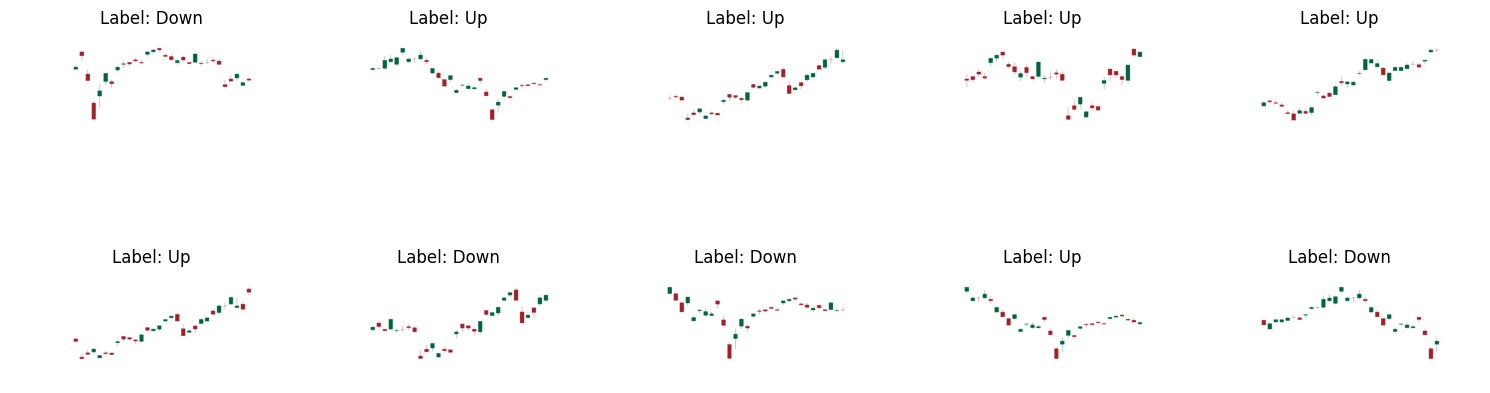

In [119]:
# 載入 CSV label檔案
output_dir = 'k_line_images'
labels_df = pd.read_csv('labels.csv', dtype={'label': str})

# 隨機選10張圖
random_indices = random.sample(range(len(labels_df)), 10)
selected_images = labels_df.iloc[random_indices]

# 設定 2*5 畫布
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# 將圖放進畫布中
for i, (index, row) in enumerate(selected_images.iterrows()):
    img_path = os.path.join(output_dir, row['file_name'])
    img = Image.open(img_path)
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Label: {'Up' if row['label'] == '1' else 'Down'}")

plt.tight_layout()
plt.show()

In [120]:
from sklearn.model_selection import train_test_split

# 先從原始資料中切分出測試集 (20%)
train_df, test_df = train_test_split(labels_df, test_size=0.2, stratify=labels_df['label'], random_state=42)

# 然後再把訓練集劃分成訓練集與驗證集 (80% 訓練，20% 驗證)
train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=42)


In [121]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# K線圖位置路徑
image_dir = 'k_line_images/'

# 建立資料集生成器
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,     # 隨機選轉
    width_shift_range=0.1,  # 水平平移
    height_shift_range=0.1, # 垂直平移
    zoom_range=0.1,         # 隨機縮放
    horizontal_flip=True,   # 水平翻轉
    validation_split=0.2)   # 20% 當驗證集

In [122]:
# 訓練集生成器
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=image_dir,
    x_col="file_name",
    y_col="label",
    target_size=(150, 150),
    batch_size=8,
    class_mode='binary'
)

# 驗證集生成器
validation_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=image_dir,
    x_col="file_name",
    y_col="label",
    target_size=(150, 150),
    batch_size=8,
    class_mode='binary'
)

# 測試集生成器（注意這裡不進行資料增強）
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=image_dir,
    x_col="file_name",
    y_col="label",
    target_size=(150, 150),
    batch_size=8,
    class_mode='binary',
    shuffle=False  # 測試集不需要隨機打亂
)

Found 52 validated image filenames belonging to 2 classes.
Found 13 validated image filenames belonging to 2 classes.
Found 17 validated image filenames belonging to 2 classes.


In [123]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # 模型容器
from tensorflow.keras.layers import (
    Input, # 輸入層
    Conv2D,  # 卷積層
    MaxPooling2D, # 最大池化層
    Flatten, # 展平層
    Dense, # 全連接層
    LeakyReLU, # 避免梯度消失
    Dropout, # 避免過擬合
    BatchNormalization # 批次正規化
)
from tensorflow.keras.optimizers import Adam # 模型優化器
from tensorflow.keras.callbacks import ReduceLROnPlateau # 動態調整學習率

# 設定學習率動態調整
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# 建立模型容器
model = Sequential()

model.add(Input(shape=(150, 150, 3)))

# 第一層卷積層 + 批次歸一化 + LeakyReLU + 最大池化
model.add(Conv2D(32, (5, 5)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D((2, 2)))

# 第二層卷積層 + 批次歸一化 + LeakyReLU + 最大池化
model.add(Conv2D(64, (5, 5)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D((2, 2)))

# 第三層卷積層 + 批次歸一化 + LeakyReLU + 最大池化
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D((2, 2)))

# 加入 Dropout 層來防止過擬合
model.add(Dropout(0.2))

# 展平層
model.add(Flatten())

# 全連接層 + LeakyReLU
model.add(Dense(128))
# 加入 Dropout 層
model.add(Dropout(0.2))

model.add(Dense(64))
# 加入 Dropout 層
model.add(Dropout(0.2))

# 輸出層（使用 sigmoid 進行二元分類）
model.add(Dense(1, activation='sigmoid'))

# 編譯模型
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [124]:
# 模型訓練
hist = model.fit(
    train_generator,  # 訓練集生成器
    validation_data=validation_generator,  # 驗證集生成器
    epochs=30,  # 訓練週期
    callbacks=[reduce_lr]  # 使用動態調整學習率的回调函數
    )

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 981ms/step - accuracy: 0.4642 - loss: 30.2923 - val_accuracy: 0.5385 - val_loss: 0.7535 - learning_rate: 0.0010
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.4163 - loss: 17.3842 - val_accuracy: 0.5385 - val_loss: 2.5141 - learning_rate: 0.0010
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.5001 - loss: 13.0143 - val_accuracy: 0.5385 - val_loss: 2.8434 - learning_rate: 0.0010
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 683ms/step - accuracy: 0.4288 - loss: 16.8907 - val_accuracy: 0.5385 - val_loss: 3.4584 - learning_rate: 0.0010
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 872ms/step - accuracy: 0.5220 - loss: 7.6877 - val_accuracy: 0.5385 - val_loss: 5.1280 - learning_rate: 2.0000e-04
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 671ms/step - accuracy: 0.7209 - loss: 5.5378 - val_accuracy: 0.5385 - val_loss: 0.8793 - learning_rate: 2.0000e-04
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 651ms/step - accuracy: 0.5952 - loss: 7.4701 - val_accuracy: 0

In [125]:
# 測試模型
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.6066 - loss: 1.1618 
Test accuracy: 0.5882353186607361


In [126]:
# 獲取一批測試集圖片
test_images, test_labels = next(test_generator)
# 預測測試集
predictions = model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


實際結果： 漲
預測結果： 漲


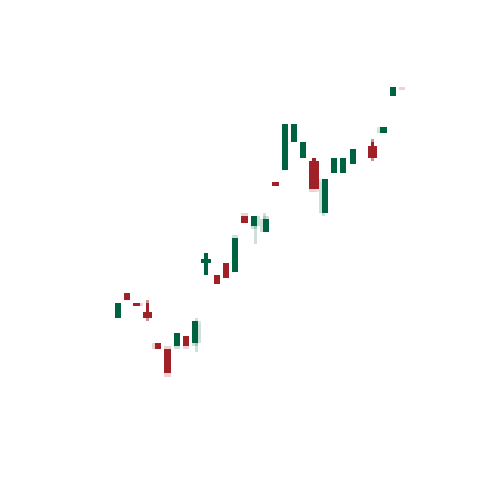

In [127]:
print('實際結果：', '漲' if test_labels[0] == 1 else '跌') # 實際邊謙 0 為跌 1 為漲
print('預測結果：', '漲' if predictions[0] > 0.5 else '跌') # Sigmoid 0.5 為閾值

plt.figure(figsize=(15, 6))
plt.imshow(test_images[0])
plt.axis('off')
plt.show()